### Ch8_1.py

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

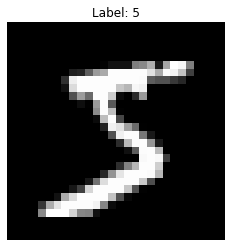

In [3]:
from keras.datasets import mnist
%matplotlib inline
# 載入 MNIST 資料集, 如果是第一次載入會自行下載資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 顯示 Numpy 二維陣列內容
print(X_train[0])
print('________________________________________________')
print(Y_train[0])   # 標籤資料

import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="gray")
plt.title("Label: " + str(Y_train[0]))
plt.axis("off")
# 顯示數字圖片
plt.show()

### Ch8_1a.py

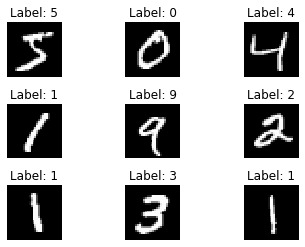

In [4]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 載入 MNIST 資料集, 如果需要, 會自行下載
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 繪出9個數字圖片
sub_plot= 330
for i in range(0, 9):
    ax = plt.subplot(sub_plot+i+1)
    ax.imshow(X_train[i], cmap="gray")
    ax.set_title("Label: " + str(Y_train[i]))
    ax.axis("off")

plt.subplots_adjust(hspace = .5)
# 顯示數字圖片
plt.show()


### Ch8_2_1.py

In [7]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical

# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 將 28*28 圖片轉換成 784 的向量
print("X_train Shape: ", X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 28*28).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28*28).astype("float32")
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
X_test = X_test / 255
print(X_train[0][150:175])
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print("Y_train Shape: ", Y_train.shape)
print(Y_train[0])

X_train Shape:  (60000, 28, 28)
X_train Shape:  (60000, 784)
X_test Shape:  (10000, 784)
[0.         0.         0.01176471 0.07058824 0.07058824 0.07058824
 0.49411765 0.53333336 0.6862745  0.10196079 0.6509804  1.
 0.96862745 0.49803922 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
Y_train Shape:  (60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Ch8_2_2.py

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________

Testing ...
60000/60000 [==============================] - 1s 13us/step
訓練資料集的準確度 = 0.99
10000/10000 [==============================] - 0s 14us/step
測試資料集的準確度 = 0.98


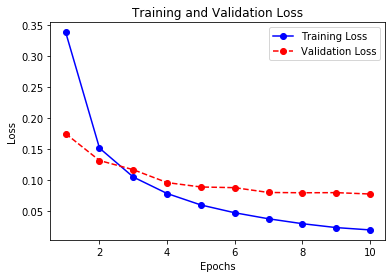

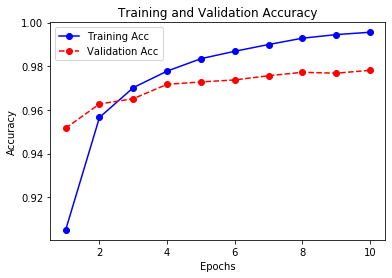

In [11]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 轉換成 2**28 = 784 的向量
X_train = X_train.reshape(X_train.shape[0], 28*28).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28*28).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
X_test = X_test / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 定義模型
model = Sequential()
model.add(Dense(256, input_dim=28*28, activation="relu")) # 784*256+256
model.add(Dense(10, activation="softmax")) # 256*10 + 10
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=10, batch_size=128, verbose=0)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

* 200960 = 784*256+256
* 2570 = 256*10 + 10
* overfitting

### Ch8_2_3.py
* MLP learns global patterns
* overfitting is not improved by increasing neurons.

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________

Testing ...
60000/60000 [==============================] - 1s 22us/step
訓練資料集的準確度 = 0.99
10000/10000 [==============================] - 0s 25us/step
測試資料集的準確度 = 0.98


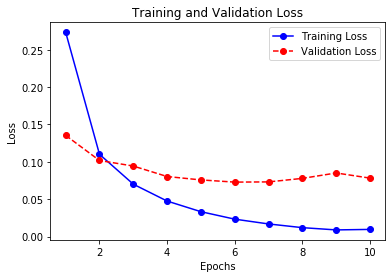

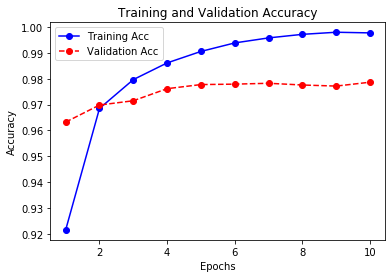

In [13]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 將 28*28 圖片轉換成 784 的向量
X_train = X_train.reshape(X_train.shape[0], 28*28).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28*28).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
X_test = X_test / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 定義模型
model = Sequential()
model.add(Dense(784, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=10, batch_size=128, verbose=0)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Ch8_2_4.py
* Overfitting is not improved by adding hidden layer.

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________

Testing ...
60000/60000 [==============================] - 1s 14us/step
訓練資料集的準確度 = 0.99
10000/10000 [==============================] - 0s 16us/step
測試資料集的準確度 = 0.98


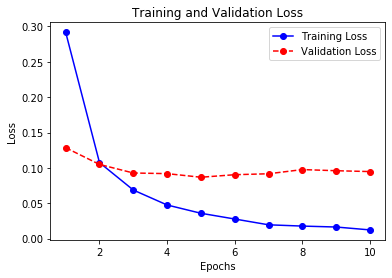

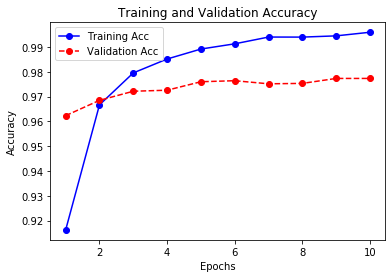

In [15]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 將 28*28 圖片轉換成 784 的向量
X_train = X_train.reshape(X_train.shape[0], 28*28).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28*28).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
X_test = X_test / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 定義模型
model = Sequential()
model.add(Dense(256, input_dim=784, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=10, batch_size=128, verbose=0)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

* 200960 = 28 * 28 * 256 + 256
* 65792 = 256 * 256 + 256
* 2570 = 256 * 10 + 10

### Ch8_2_5.py
* Dropout to improve overfitting.

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________

Testing ...
60000/60000 [==============================] - 1s 16us/step
訓練資料集的準確度 = 0.99
10000/10000 [==============================] - 0s 15us/step
測試資料集的準確度 = 0.98


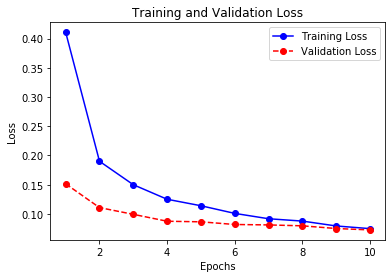

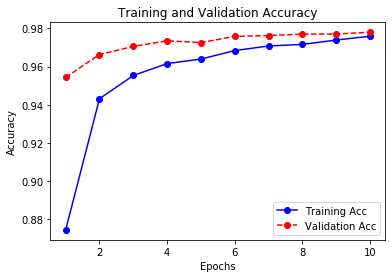

In [17]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 將 28*28 圖片轉換成 784 的向量
X_train = X_train.reshape(X_train.shape[0], 28*28).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28*28).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
X_test = X_test / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 定義模型
model = Sequential()
model.add(Dense(256, input_dim=28*28, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=10, batch_size=128, verbose=0)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [18]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical

# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 將圖片轉換成 4D 張量
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
X_test = X_test / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print("Y_train Shape: ", Y_train.shape)
print(Y_train[0])

X_train Shape:  (60000, 28, 28, 1)
X_test Shape:  (10000, 28, 28, 1)
Y_train Shape:  (60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Ch8_3_3.py
* CNN learns local patterns
* Output shape = (W - F + 2*P) / S + 1

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)              

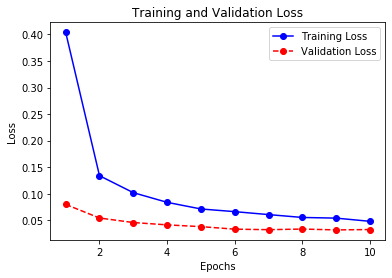

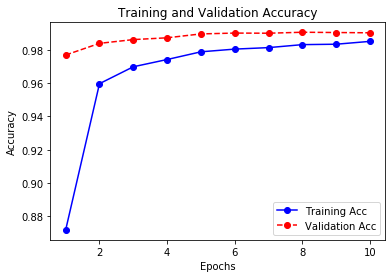

In [19]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.utils import to_categorical

# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 將圖片轉換成 4D 張量
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
X_test = X_test / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 定義模型
model = Sequential()
model.add(Conv2D(filters=16, # ouput channel number 
                 kernel_size=(5, 5), # filter or kernel shape = 5*5
                 padding="same", # output the same shape by padding 1, i.e., (28 - 5 + 2*2)/1 + 1 = 28
                 input_shape=(28, 28, 1), # height * weight * channel_num 
                 activation="relu") # 0 or x 
         ) # (None, 28, 28, 16), 416 = 1 * (5 * 5) * 16 + 16, 1: black-white input
model.add(MaxPooling2D(pool_size=(2, 2)) # 2*2 -> *1/2, 3*3 -> *1/3, due to the formula
         ) # (None, 14, 14, 16), 0
model.add(Conv2D(32, kernel_size=(5, 5), padding="same", activation="relu")) # (None, 14, 14, 32), 12832 = 16 * (5 * 5) * 32 + 32 
model.add(MaxPooling2D(pool_size=(2, 2))) # (None, 7, 7, 32), 0
model.add(Dropout(0.5)) # regularization, (None, 7, 7, 32), 0
model.add(Flatten()) # (None, 7 * 7 * 32), 0
model.add(Dense(128, activation="relu")) # (None, 128), 200832 = 1568 * 128 + 128
model.add(Dropout(0.5)) # (None, 128), 0
model.add(Dense(10, activation="softmax")) # (None, 10), 1290 = 128 * 10 + 10
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=10, batch_size=128, verbose=0)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 儲存Keras模型
print("Saving Model: mnist.h5 ...")
model.save("mnist.h5")
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Pytorch Supplement 
https://morvanzhou.github.io/tutorials/machine-learning/torch/4-01-CNN/

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(  # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,      # input height
                out_channels=16,    # n_filters
                kernel_size=5,      # filter size
                stride=1,           # filter movement/step
                padding=2,      # 如果想要 con2d 出來的圖片長寬沒有變化, padding=(kernel_size-1)/2 當 stride=1
            ),      # output shape (16, 28, 28)
            nn.ReLU(),    # activation
            nn.MaxPool2d(kernel_size=2),    # 在 2x2 空間裡向下採樣, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(  # input shape (16, 14, 14)
            nn.Conv2d(16, 32, 5, 1, 2),  # output shape (32, 14, 14)
            nn.ReLU(),  # activation
            nn.MaxPool2d(2),  # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)   # 展平多維的卷積圖成 (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output

cnn = CNN()
print(cnn)  # net architecture

### Ch8_4.py

In [20]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import load_model
from keras.utils import to_categorical

# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 將圖片轉換成 4D 張量
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test = X_test / 255
# One-hot編碼
Y_test_bk = Y_test.copy()   # 備份 Y_test 資料集
Y_test = to_categorical(Y_test)
# 建立Keras的Sequential模型
model = Sequential()
model = load_model("mnist.h5")
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 評估模型
print("Testing ...")
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 計算分類的預測值
print("\nPredicting ...")
Y_pred = model.predict_classes(X_test)
# 顯示混淆矩陣
tb = pd.crosstab(Y_test_bk.astype(int), Y_pred.astype(int),
                 rownames=["label"], colnames=["predict"])
print(tb)
tb.to_html("Ch8_4.html")

Testing ...
10000/10000 [==============================] - 1s 82us/step
測試資料集的準確度 = 0.99

Predicting ...
predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        975     0     0     0    0    0    3     1    1    0
1          0  1130     1     2    0    0    0     1    1    0
2          1     0  1027     1    0    0    0     2    1    0
3          0     0     0  1006    0    1    0     2    1    0
4          0     0     0     0  976    0    1     1    0    4
5          0     0     0     8    0  880    4     0    0    0
6          4     2     0     0    1    0  951     0    0    0
7          0     1     5     4    0    0    0  1017    1    0
8          1     1     2     1    0    1    0     2  965    1
9          2     2     0     3    4    3    0     5    3  987


### Ch8_4a.py
* positive prediction

Predicting ...
[[4.5100272e-08 7.7866851e-08 4.5032971e-06 5.0290280e-05 3.3344890e-04
  4.4451714e-05 1.4466668e-08 3.5703681e-07 8.7464071e-04 9.9869210e-01]]


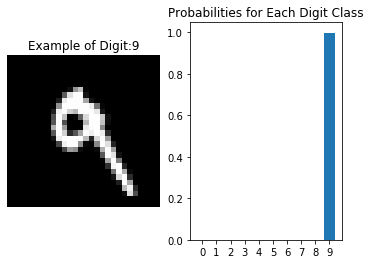

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import load_model

# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 選一個測試的數字圖片 
# i = np.random.randint(0, len(X_test))
i = 7
digit = X_test[i].reshape(28, 28)
# 將圖片轉換成 4D 張量
X_test_digit = X_test[i].reshape(1, 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test_digit = X_test_digit / 255
# 建立Keras的Sequential模型
model = Sequential()
model = load_model("mnist.h5")
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 繪出圖表的預測結果
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Digit:" + str(Y_test[i]))
plt.imshow(digit, cmap="gray")
plt.axis("off")
# 預測結果的機率
print("Predicting ...")
probs = model.predict_proba(X_test_digit, batch_size=1)
print(probs)
plt.subplot(1,2,2)
plt.title("Probabilities for Each Digit Class")
plt.bar(np.arange(10), probs.reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()

### Ch8_4b.py
* false prediction

Predicting ...
     label  predict
340      5        3
445      6        0
551      7        3
582      8        2
619      1        8
Index:  1621


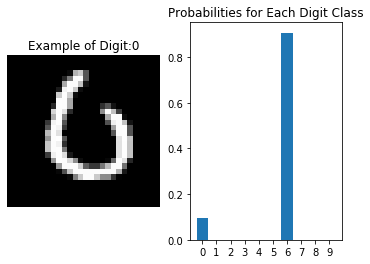

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import load_model

# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 將圖片轉換成 4D 張量
X_test_bk = X_test.copy()   # 備份 X_test 測試資料集
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test = X_test / 255
# 建立Keras的Sequential模型
model = Sequential()
model = load_model("mnist.h5")
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 測試資料集的分類和機率的預測值
print("Predicting ...")
Y_pred = model.predict_classes(X_test)  # 分類
Y_probs = model.predict_proba(X_test)   # 機率
# 建立分類錯誤的 DataFrame 物件
df = pd.DataFrame({"label":Y_test, "predict":Y_pred})
df = df[Y_test!=Y_pred]  # 篩選出分類錯誤的資料
print(df.head())
df.head().to_html("Ch8_4b.html")
# 隨機選 1 個錯誤分類的數字索引
i = df.sample(n=1).index.values.astype(int)[0]
print("Index: ", i)
digit = X_test_bk[i].reshape(28, 28) 
# 繪出圖表的預測結果
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Digit:" + str(Y_test[i]))
plt.imshow(digit, cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Probabilities for Each Digit Class")
plt.bar(np.arange(10), Y_probs[i].reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()